In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import itertools
import random

from tqdm import tqdm
import gc

import sys
sys.path.insert(1, '../../scripts/')
from simulation.utils import get_truncated_normal, piecewise_fit, fit_params
from simulation.utils import relat,x
from simulation.simulate import Simulate, CCI_MD

dp = '/data2/hratch/cci_dt/figures/'

/home/hratch/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/hratch/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


# Background Noise

## No scaling

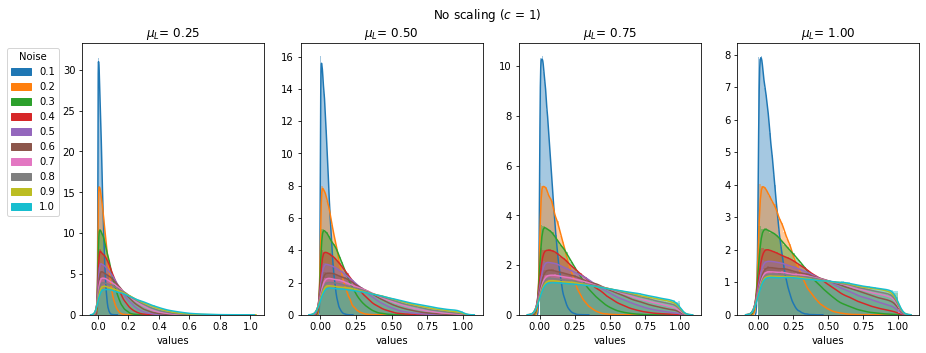

In [8]:
scale = 1
background_sim = pd.DataFrame(columns = ['values', 'mean', 'noise'])
for mean in np.arange(0.25, 1.01, 0.25):
    for noise in np.arange(0.1, 1.01, 0.1):
        vals = get_truncated_normal(n = 10**5, sd = noise*mean*scale)
        df = pd.DataFrame(columns = ['values', 'mean', 'noise'])
        df['values'] = vals
        df['mean'] = mean
        df['noise'] = noise
        background_sim = pd.concat([background_sim, df])
        
mean_vals = background_sim['mean'].unique().tolist()
noise_vals = background_sim['noise'].unique().tolist()
colors = sns.color_palette("tab10")[:len(noise_vals)]
fig, ax = plt.subplots(nrows = 1, ncols = len(mean_vals), figsize = (15,5))
for i in range(len(mean_vals)):
    for j in range(len(noise_vals)):
        viz_df = background_sim[(background_sim['mean'] == mean_vals[i]) & (background_sim['noise'] == noise_vals[j])]
        sns.distplot(a = viz_df['values'], color=colors[j], ax = ax[i])
        ax[i].set_title(r'$\mu_L$' + '= {:.2f}'.format(mean_vals[i]))
    

patches = [mpatches.Patch(color=colors[j], label='{:.1f}'.format(noise_vals[j])) for j in range(len(noise_vals))]
ax[0].legend(handles=patches, title = 'Noise', bbox_to_anchor=(-0.1, 1))
fig.suptitle('No scaling ($\it{c}$ = 1)')
plt.savefig(dp + 'background_noise_means_noscale.pdf', bbox_to_inches = 'tight')
plt.savefig(dp + 'background_noise_means_noscale.png', bbox_to_inches = 'tight')

In [9]:
summ = background_sim[background_sim['noise'] == 1].groupby('mean').mean()
summ.rename(columns = {'values': 'mu_b'}, inplace = True)
summ['mu_L'] = summ.index
summ.reset_index(inplace = True, drop = True)
summ

,mu_b,noise,mu_L
0,0.199868,1.0,0.25
1,0.360306,1.0,0.50
2,0.431178,1.0,0.75
3,0.461443,1.0,1.00


## Scaling

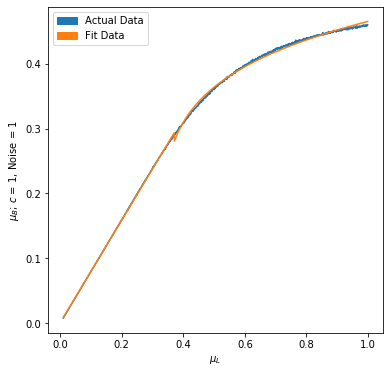

In [17]:
relat['fit_mean'] = piecewise_fit(x, *fit_params)
for col in relat.columns:
    relat[col] = relat[col].astype(float)

colors = sns.color_palette("tab10")[:2]
fig,ax =plt.subplots(figsize = (6,6))
sns.lineplot(data = relat, x = 'mean', y = 'noise_mean', ax = ax, color = colors[0])
sns.lineplot(data = relat, x = 'mean', y = 'fit_mean', ax = ax, color = colors[1])
ax.set_ylabel(r'$\mu_B$' + '; $\it{c}$ = 1, Noise = 1')
ax.set_xlabel(r'$\mu_L$')

patch1 = mpatches.Patch(color=colors[0], label='Actual Data')
patch2 = mpatches.Patch(color=colors[1], label='Fit Data')
plt.legend(handles=[patch1,patch2])

plt.savefig(dp + 'curve_fitting_background_noise.pdf', bbox_to_inches = 'tight')
plt.savefig(dp + 'curve_fitting_background_noise.png', bbox_to_inches = 'tight')

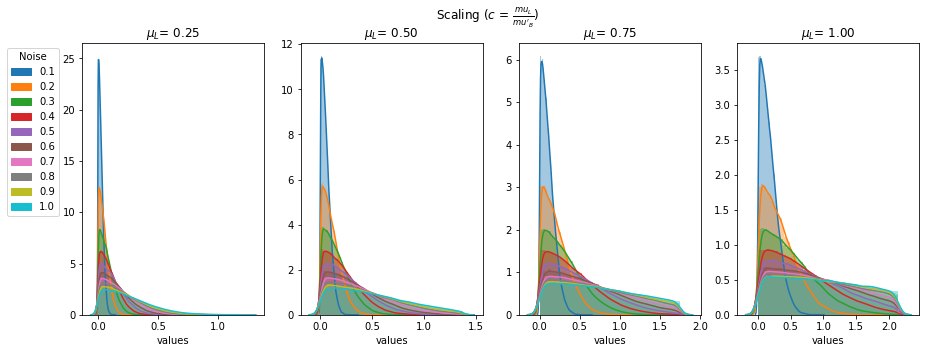

In [18]:
background_sim = pd.DataFrame(columns = ['values', 'mean', 'noise'])
for mean in np.arange(0.25, 1.01, 0.25):
    scale = mean/np.array([piecewise_fit(mean, *fit_params)])[0]
    for noise in np.arange(0.1, 1.01, 0.1):
        vals = get_truncated_normal(n = 10**5, sd = noise*mean)*scale
        df = pd.DataFrame(columns = ['values', 'mean', 'noise'])
        df['values'] = vals
        df['mean'] = mean
        df['noise'] = noise
        background_sim = pd.concat([background_sim, df])
        
mean_vals = background_sim['mean'].unique().tolist()
noise_vals = background_sim['noise'].unique().tolist()
colors = sns.color_palette("tab10")[:len(noise_vals)]
fig, ax = plt.subplots(nrows = 1, ncols = len(mean_vals), figsize = (15,5))
for i in range(len(mean_vals)):
    for j in range(len(noise_vals)):
        viz_df = background_sim[(background_sim['mean'] == mean_vals[i]) & (background_sim['noise'] == noise_vals[j])]
        sns.distplot(a = viz_df['values'], color=colors[j], ax = ax[i])
        ax[i].set_title(r'$\mu_L$' + '= {:.2f}'.format(mean_vals[i]))
    

patches = [mpatches.Patch(color=colors[j], label='{:.1f}'.format(noise_vals[j])) for j in range(len(noise_vals))]
ax[0].legend(handles=patches, title = 'Noise', bbox_to_anchor=(-0.1, 1))
fig.suptitle('Scaling ($\it{c}$ = ' + r"$\frac{mu_L}{mu'_B}$" + ')')
plt.savefig(dp + 'background_noise_means_scale.pdf', bbox_to_inches = 'tight')
plt.savefig(dp + 'background_noise_means_scale.png', bbox_to_inches = 'tight')

In [19]:
summ = background_sim[background_sim['noise'] == 1].groupby('mean').mean()
summ.rename(columns = {'values': 'mu_B'}, inplace = True)
summ['mu_L'] = summ.index
summ.reset_index(inplace = True, drop = True)
summ

,mu_B,noise,mu_L
0,0.251572,1.0,0.25
1,0.498209,1.0,0.50
2,0.753550,1.0,0.75
3,0.988513,1.0,1.00


# actual interactions

In [23]:
actual_interactions = pd.DataFrame(columns = ['values', 'mean', 'noise'])
for mean in np.arange(0.25, 1.01, 0.25):
    for noise in np.arange(0.1, 1.01, 0.1):
        vals = get_truncated_normal(n = 10**5, sd = noise*mean, mean = mean)
        df = pd.DataFrame(columns = ['values', 'mean', 'noise'])
        df['values'] = vals
        df['mean'] = mean
        df['noise'] = noise
        actual_interactions = pd.concat([actual_interactions, df])

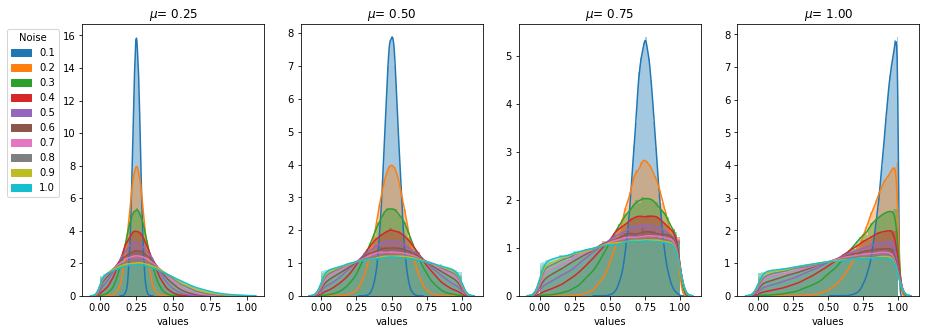

In [24]:
mean_vals = actual_interactions['mean'].unique().tolist()
noise_vals = actual_interactions['noise'].unique().tolist()
colors = sns.color_palette("tab10")[:len(noise_vals)]
fig, ax = plt.subplots(nrows = 1, ncols = len(mean_vals), figsize = (15,5))
for i in range(len(mean_vals)):
    for j in range(len(noise_vals)):
        viz_df = actual_interactions[(actual_interactions['mean'] == mean_vals[i]) & (actual_interactions['noise'] == noise_vals[j])]
        sns.distplot(a = viz_df['values'], color=colors[j], ax = ax[i])
        ax[i].set_title(r'$\mu$' + '= {:.2f}'.format(mean_vals[i]))
    

patches = [mpatches.Patch(color=colors[j], label='{:.1f}'.format(noise_vals[j])) for j in range(len(noise_vals))]
ax[0].legend(handles=patches, title = 'Noise', bbox_to_anchor=(-0.1, 1))
# fig.suptitle('Scaling ($\it{c}$ = ' + r"$\frac{mu_L}{mu'_B}$" + ')')
plt.savefig(dp + 'actual_noise_means.pdf', bbox_to_inches = 'tight')
plt.savefig(dp + 'actual_noise_means.png', bbox_to_inches = 'tight')

# What does a tensor slice look like across noise?

In [2]:
# generate simulation object
sim = Simulate() 
sim.LR_network(network_type = 'scale-free', **{'nodes': 100, 'degrees': 3, 'alpha': 2}) #scale-free
sim.LR.generate_metadata(n_LR_cats = {3: 0}, cat_skew = 0)

cci = CCI_MD()
cci.cci_network(n_cells = 15, directional = False)
cci.generate_metadata(n_cell_cats = {3: 0}, cat_skew = 0, remove_homotypic = 1)

sim.cci = cci 
sim.generate_tensor_md(n_patterns = 3, n_conditions = 0, patterns = ['pulse', 'linear', 'oscillate'])

/home/hratch/Projects/cci_dt/notebooks/simulation/tmpy289u7ct_bipartite_sf.csv
Generate undirected, bipartite, scale-free graph
Check network properties
All properties are as expected
Remove homotypic cell interactions for 1 categories


../../scripts/simulation/graphs.py:164: UserWarning: 69 nodes are disconnected, removing from network
  warnings.warn(mssg)
../../scripts/simulation/simulate.py:499: UserWarning: No conditions specified, only a tensor slice will be generated
  warnings.warn('No conditions specified, only a tensor slice will be generated')


In [3]:
# get background coordinates
coords = list()
for x in sim.clrm.ts_coordinates:
    i,j = x[0], x[1]
    coords += [(i[k], j[k]) for k in range(len(i))]
all_coords = list(itertools.product(range(sim.ts_frame.shape[0]), range(sim.ts_frame.shape[1])))
background_coords = list(set(all_coords).difference(coords))
background_coords = [tuple([i[0] for i in background_coords]), tuple([i[1] for i in background_coords])]

In [4]:
print('Generate melted df for one tensor slice')
res_all = pd.DataFrame(columns = ['score', 'noise', 'cat'])
for noise in tqdm(np.arange(0,1.01, 0.2)):
    viz = sim.copy()
    viz.generate_tensor(noise = noise, binary = False)
    for cat in viz.clrm.index:
        res_ = pd.DataFrame(columns = ['score', 'cat', 'noise'])
        res_['score'] = viz.ts['0'].values[viz.clrm.loc[cat,'ts_coordinates']]
        res_['cat'] = str(cat)
        res_['noise'] = noise
        res_all = pd.concat([res_all, res_], axis = 0)
    
    res_ = pd.DataFrame(columns = ['score', 'cat', 'noise'])
    res_['score'] = viz.ts['0'].values[background_coords]
    res_['cat'] = 'background'
    res_['noise'] = noise
    res_all = pd.concat([res_all, res_], axis = 0)
    
res_all.reset_index(inplace = True, drop = True)
res_all['score'] = res_all['score'].astype(float)
list_ordering = ['background','0', '1', '2', '3']
res_all["cat"] = pd.Categorical(res_all["cat"], categories=list_ordering) 

  0%|          | 0/6 [00:00<?, ?it/s]../../scripts/simulation/simulate.py:601: UserWarning: Only continuous scoring is currently implemented
  warnings.warn('Only continuous scoring is currently implemented')
../../scripts/simulation/simulate.py:613: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df.values[coords] = avg_val # non-backgroun
/home/hratch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/hratch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: Fut

Generate melted df for one tensor slice
0 noise


100%|██████████| 6/6 [00:00<00:00, 23.55it/s]


In [9]:
# res_sub = res_all.loc[random.sample(res_all.index.tolist(), k = round(res_all.shape[0]*0.2))]
# del res_all

Graph one tensor slice
Complete graph one tensor slice


''

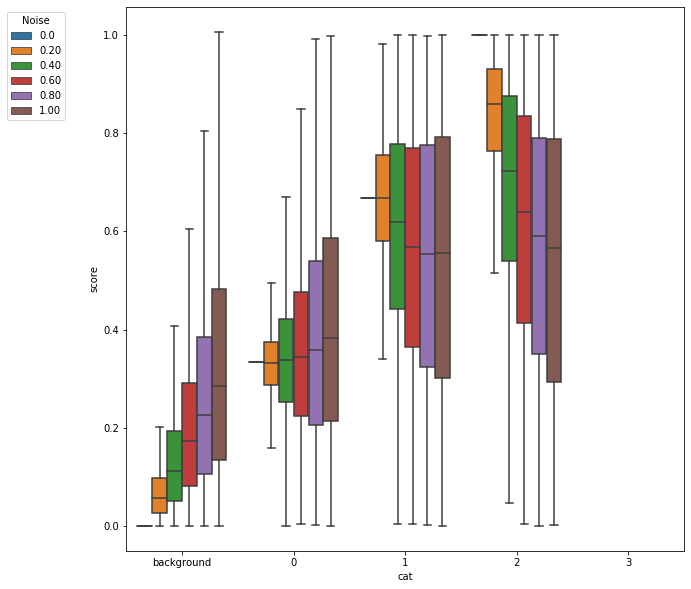

In [24]:
print('Graph one tensor slice')
fig,ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = res_all, x = 'cat', y = 'score', hue = 'noise', 
            showfliers=False)
handles, labels = ax.get_legend_handles_labels()
labels = [labels[0]] + ['{:.2f}'.format(float(i)) for i in labels[1:]]
ax.legend(labels=labels, handles = handles,bbox_to_anchor=(-0.1, 1), title = 'Noise')

# plt.savefig(dp + 'ts0_comparison.pdf', bbox_to_inches = 'tight')
# plt.savefig(dp + 'ts0_comparison.png', bbox_to_inches = 'tight')
print('Complete graph one tensor slice')
;

# What does a CC-LR metadata pair look like across conditions?

In [40]:
# generate simulation object
sim = Simulate() 
sim.LR_network(network_type = 'scale-free', **{'nodes': 100, 'degrees': 3, 'alpha': 2}) #scale-free
sim.LR.generate_metadata(n_LR_cats = {3: 0}, cat_skew = 0)

cci = CCI_MD()
cci.cci_network(n_cells = 15, directional = False)
cci.generate_metadata(n_cell_cats = {3: 0}, cat_skew = 0, remove_homotypic = 1)

sim.cci = cci 
sim.generate_tensor_md(n_patterns = 3, n_conditions = 7, patterns = ['pulse', 'linear', 'oscillate'])

/home/hratch/Projects/cci_dt/notebooks/simulation/tmpqo7t4eau_bipartite_sf.csv
Generate undirected, bipartite, scale-free graph
Check network properties
All properties are as expected
Remove homotypic cell interactions for 1 categories


../../scripts/simulation/graphs.py:164: UserWarning: 64 nodes are disconnected, removing from network
  warnings.warn(mssg)


In [41]:
# get background coordinates
coords = list()
for x in sim.clrm.ts_coordinates:
    i,j = x[0], x[1]
    coords += [(i[k], j[k]) for k in range(len(i))]
all_coords = list(itertools.product(range(sim.ts_frame.shape[0]), range(sim.ts_frame.shape[1])))
background_coords = list(set(all_coords).difference(coords))
background_coords = [tuple([i[0] for i in background_coords]), tuple([i[1] for i in background_coords])]

In [42]:
print('Generate melted df for multiple conditions')
res_all = pd.DataFrame(columns = ['score', 'noise', 'cat', 'condition'])

for noise in tqdm(np.arange(0,1.01, 0.33)):
    print('---------------------------------------')
    viz = sim.copy()
    viz.generate_tensor(noise = noise, binary = False)
    for cond in viz.ts:
        for cat in viz.clrm.index:
            res_ = pd.DataFrame(columns = ['score', 'cat', 'noise', 'condition'])
            res_['score'] = viz.ts[cond].values[viz.clrm.loc[cat,'ts_coordinates']]
            res_['cat'] = str(cat)
            res_['noise'] = noise
            res_['condition'] = cond
            res_all = pd.concat([res_all, res_], axis = 0)

        res_ = pd.DataFrame(columns = ['score', 'cat', 'noise', 'condition'])
        res_['score'] = viz.ts['0'].values[background_coords]
        res_['cat'] = 'background'
        res_['noise'] = noise
        res_['condition'] = cond
        res_all = pd.concat([res_all, res_], axis = 0)
    
res_all.reset_index(inplace = True, drop = True)
res_all['score'] = res_all['score'].astype(float)

cat_ordering = ['background','0', '1', '2']
res_all["cat"] = pd.Categorical(res_all["cat"], categories=cat_ordering) 

cond_ordering = sorted(res_all.condition.unique())
res_all["condition"] = pd.Categorical(res_all["condition"], categories=cond_ordering) 

noise_ordering = sorted(res_all.noise.unique())
res_all["noise"] = pd.Categorical(res_all["noise"], categories=noise_ordering) 

  0%|          | 0/4 [00:00<?, ?it/s]

Generate melted df for multiple conditions
---------------------------------------
0 noise


../../scripts/simulation/simulate.py:601: UserWarning: Only continuous scoring is currently implemented
  warnings.warn('Only continuous scoring is currently implemented')
../../scripts/simulation/simulate.py:613: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  df.values[coords] = avg_val # non-backgroun
/home/hratch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/home/hratch/anaconda3/lib/python3.7/site-packages/ipykernel_

---------------------------------------


 50%|█████     | 2/4 [00:00<00:00,  2.44it/s]

---------------------------------------


 75%|███████▌  | 3/4 [00:01<00:00,  1.91it/s]

---------------------------------------


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


In [43]:
# res_sub = res_all.loc[random.sample(res_all.index.tolist(), k = round(res_all.shape[0]*0.005))]

  0%|          | 0/3 [00:00<?, ?it/s]

Generate graph multiple conditions


100%|██████████| 3/3 [00:04<00:00,  1.49s/it]

Complete graph multiple conditions


''

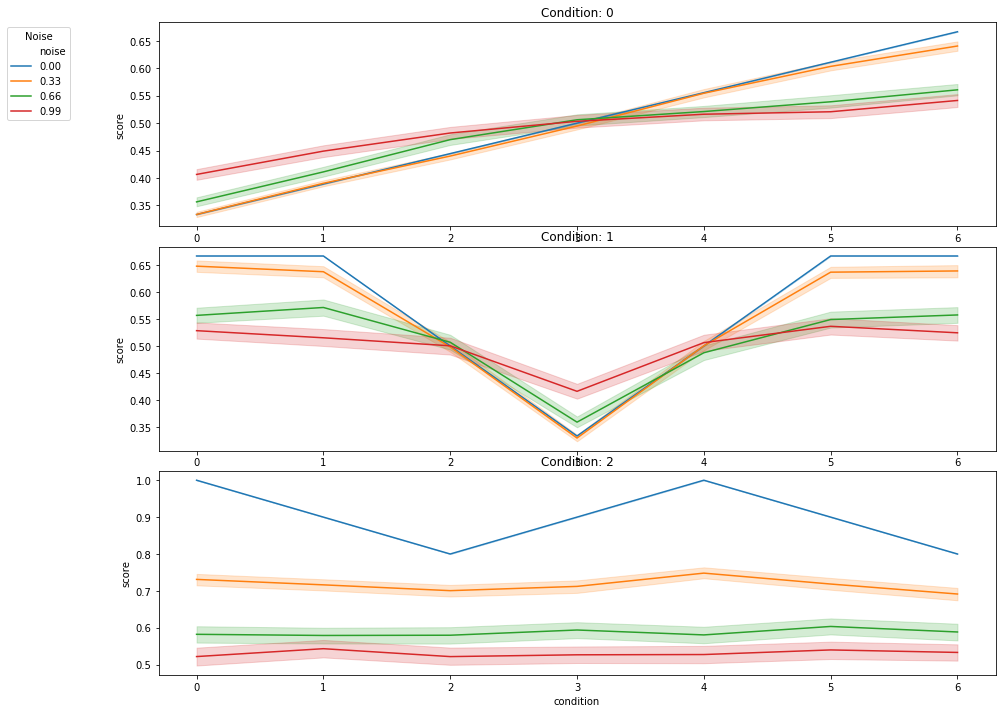

In [44]:
print('Generate graph multiple conditions')
cats = sorted(res_all.cat.unique().tolist())
cats.remove('background')
# labels_ = ['{:.2f}'.format(n) for n in sorted(res_all.noise.unique())]
colors = sns.color_palette("tab10")[:len(res_all.noise.unique())]

fig, ax = plt.subplots(nrows = len(cats), figsize = (15,12))
counter = 0
for cat in tqdm(cats):
    viz = res_all[res_all.cat == cat]
    sns.lineplot(data = viz, y = 'score', x = 'condition', hue =  'noise', palette = colors,
                 ax = ax[counter])
    if counter == 0:
        handles, labels = ax[counter].get_legend_handles_labels()
        labels = [labels[0]] + ['{:.2f}'.format(float(i)) for i in labels[1:]]
        ax[counter].legend(labels=labels, handles = handles,bbox_to_anchor=(-0.1, 1), title = 'Noise')
    else:
        ax[counter].get_legend().remove()

    ax[counter].set_title('Condition: ' + cat)
    counter += 1

# plt.savefig(dp + 'pattern_delta_condition.pdf', bbox_to_inches = 'tight')
# plt.savefig(dp + 'pattern_delta_condition.pdf', bbox_to_inches = 'tight')
print('Complete graph multiple conditions')
plt.subplots_adjust(hspace=0.1)

;

In [51]:
sim.clrm.loc[:, ['pattern'] + [str(i) for i in range(sim.n_conditions)]]

,pattern,0,1,2,3,4,5,6
0,linear,0.333333,0.388889,0.444444,0.500000,0.555556,0.611111,0.666667
1,pulse,0.666667,0.666667,0.500000,0.333333,0.500000,0.666667,0.666667
2,oscillate,1.000000,0.900000,0.800000,0.900000,1.000000,0.900000,0.800000


['0', '1', '2', '3', '4', '5', '6']